Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [57]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [61]:
crime=pd.read_csv('crime_data.csv')

In [62]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [63]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [64]:
crime.shape

(50, 5)

In [65]:
# Renaming the column
crime=crime.rename({'Unnamed: 0':'Place'},axis=1)
crime.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [66]:
#Check for Null Values
crime.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [67]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [68]:
# Normalized data frame (considering the numerical part of data)
scaled = norm_func(crime.iloc[:,1:])

 # Hierarchical Clustering

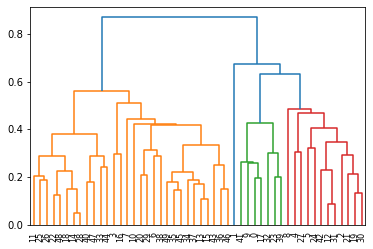

In [69]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled, method='average'))

In [70]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')

In [71]:
# save clusters for chart
y_hc = hc.fit_predict(scaled)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,2
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [72]:
crime['clusterid_hc']=Clusters

In [73]:
crime

,Place,Murder,Assault,UrbanPop,Rape,clusterid_hc
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [115]:
crime.groupby(['clusterid_hc']).agg(['mean']).reset_index()

,clusterid_hc,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.278947,254.842105,69.473684,28.357895
1,1,4.870000,114.433333,63.633333,15.943333
2,2,10.000000,263.000000,48.000000,44.500000


cluster1 has higher low crime rate

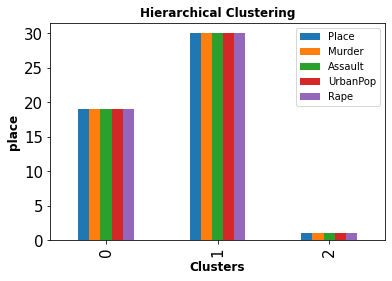

In [110]:
# Plotting barplot using groupby method to get visualization of how many row no. in each clu
crime.groupby(['clusterid_hc']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('place', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [76]:
crime[crime['clusterid_hc']==0]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_hc
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0
21,Michigan,12.1,255,74,35.1,0


In [77]:
crime[crime['clusterid_hc']==1]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_hc
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1


In [47]:
crime[crime['clusterid_hc']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_hc
1,Alaska,10.0,263,48,44.5,2


# K-Means

In [80]:
crime1=crime.drop(['clusterid_hc'],axis=1)
crime1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


C:\Users\amrut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


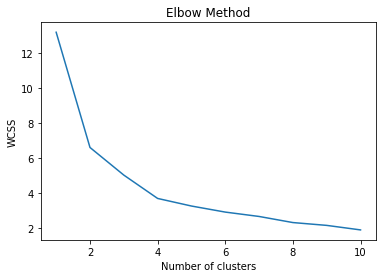

In [81]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled)

KMeans(n_clusters=4, random_state=42)

In [83]:
clusters_new.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [106]:
crime1['clusterid_k']=clusters_new.labels_
crime1.head()

,Place,Murder,Assault,UrbanPop,Rape,clusterid_k
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [86]:
crime1.groupby(['clusterid_k']).agg(['mean']).reset_index()

,clusterid_k,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.966667,264.000000,76.500000,33.608333
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.852941,141.176471,73.647059,19.335294


crime rate of cluster1>cluster2>cluster3>cluster4


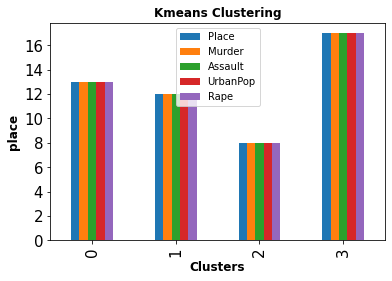

In [108]:
# Plotting barplot using groupby method to get visualization of how many row no. in each clu
crime1.groupby(['clusterid_k']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('place', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [87]:
crime1[crime1['clusterid_k']==0]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_k
11,Idaho,2.6,120,54,14.2,0
14,Iowa,2.2,56,57,11.3,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
40,South Dakota,3.8,86,45,12.8,0


In [88]:
crime1[crime1['clusterid_k']==1]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_k
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [89]:
crime1[crime1['clusterid_k']==2]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_k
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [90]:
crime1[crime1['clusterid_k']==3]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_k
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
10,Hawaii,5.3,46,83,20.2,3
13,Indiana,7.2,113,65,21.0,3
15,Kansas,6.0,115,66,18.0,3
20,Massachusetts,4.4,149,85,16.3,3
24,Missouri,9.0,178,70,28.2,3
29,New Jersey,7.4,159,89,18.8,3
34,Ohio,7.3,120,75,21.4,3
35,Oklahoma,6.6,151,68,20.0,3


# DBSCAN

In [93]:
crime2=crime1.drop(['clusterid_k'],axis=1)
crime2.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [94]:
dbscan = DBSCAN(eps=0.28, min_samples=4)
dbscan.fit(scaled)

DBSCAN(eps=0.28, min_samples=4)

In [95]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1, -1, -1,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [107]:
#Assign clusters to the data set
crime2['clusterid_DBSCAN'] = dbscan.labels_
crime2.head()

,Place,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1


In [97]:
crime2.groupby(['clusterid_DBSCAN']).agg(['mean']).reset_index()

,clusterid_DBSCAN,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.387500,228.125000,74.125000,32.937500
1,0,14.216667,258.000000,53.333333,21.000000
2,1,11.014286,262.571429,77.142857,28.800000
3,2,4.962069,114.724138,62.896552,16.224138


crime rate of cluster2>cluster1>cluster3

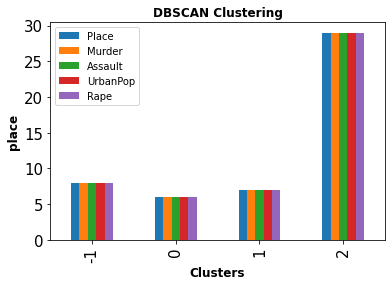

In [111]:
# Plotting barplot using groupby method to get visualization of how many row no. in each clu
crime2.groupby(['clusterid_DBSCAN']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('place', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [101]:
# States in cluster #0 
crime2[crime2['clusterid_DBSCAN']==0]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [102]:
crime2[crime2['clusterid_DBSCAN']==1]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
2,Arizona,8.1,294,80,31.0,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1
42,Texas,12.7,201,80,25.5,1


In [103]:
crime2[crime2['clusterid_DBSCAN']==2]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
20,Massachusetts,4.4,149,85,16.3,2
22,Minnesota,2.7,72,66,14.9,2


In [105]:
crime2[crime2['clusterid_DBSCAN']==-1]

,Place,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
10,Hawaii,5.3,46,83,20.2,-1
27,Nevada,12.2,252,81,46.0,-1
